# Using napari layers as data source

In certain cases, the solutions offered by the plugin to read data is not fitting your use case, e.g. because the format is not recognized or because the dimensions of the imported data is not correct (e.g. channels not recognized). It is not our plan to support all possible formats. However for such cases, we offer the possibility to use layers of the napari viewer as data sources. In such a case, you import the data as usual, by drag and dropping or via the menu, reshape the data if necessary, and then specify the layers to use.

In this example we want to open a multi-dimensional tiff file not supported by the plugin.

## Importing the data
We drag and drop the file in the viewer and obtain:

In [1]:
%load_ext autoreload
%autoreload 2

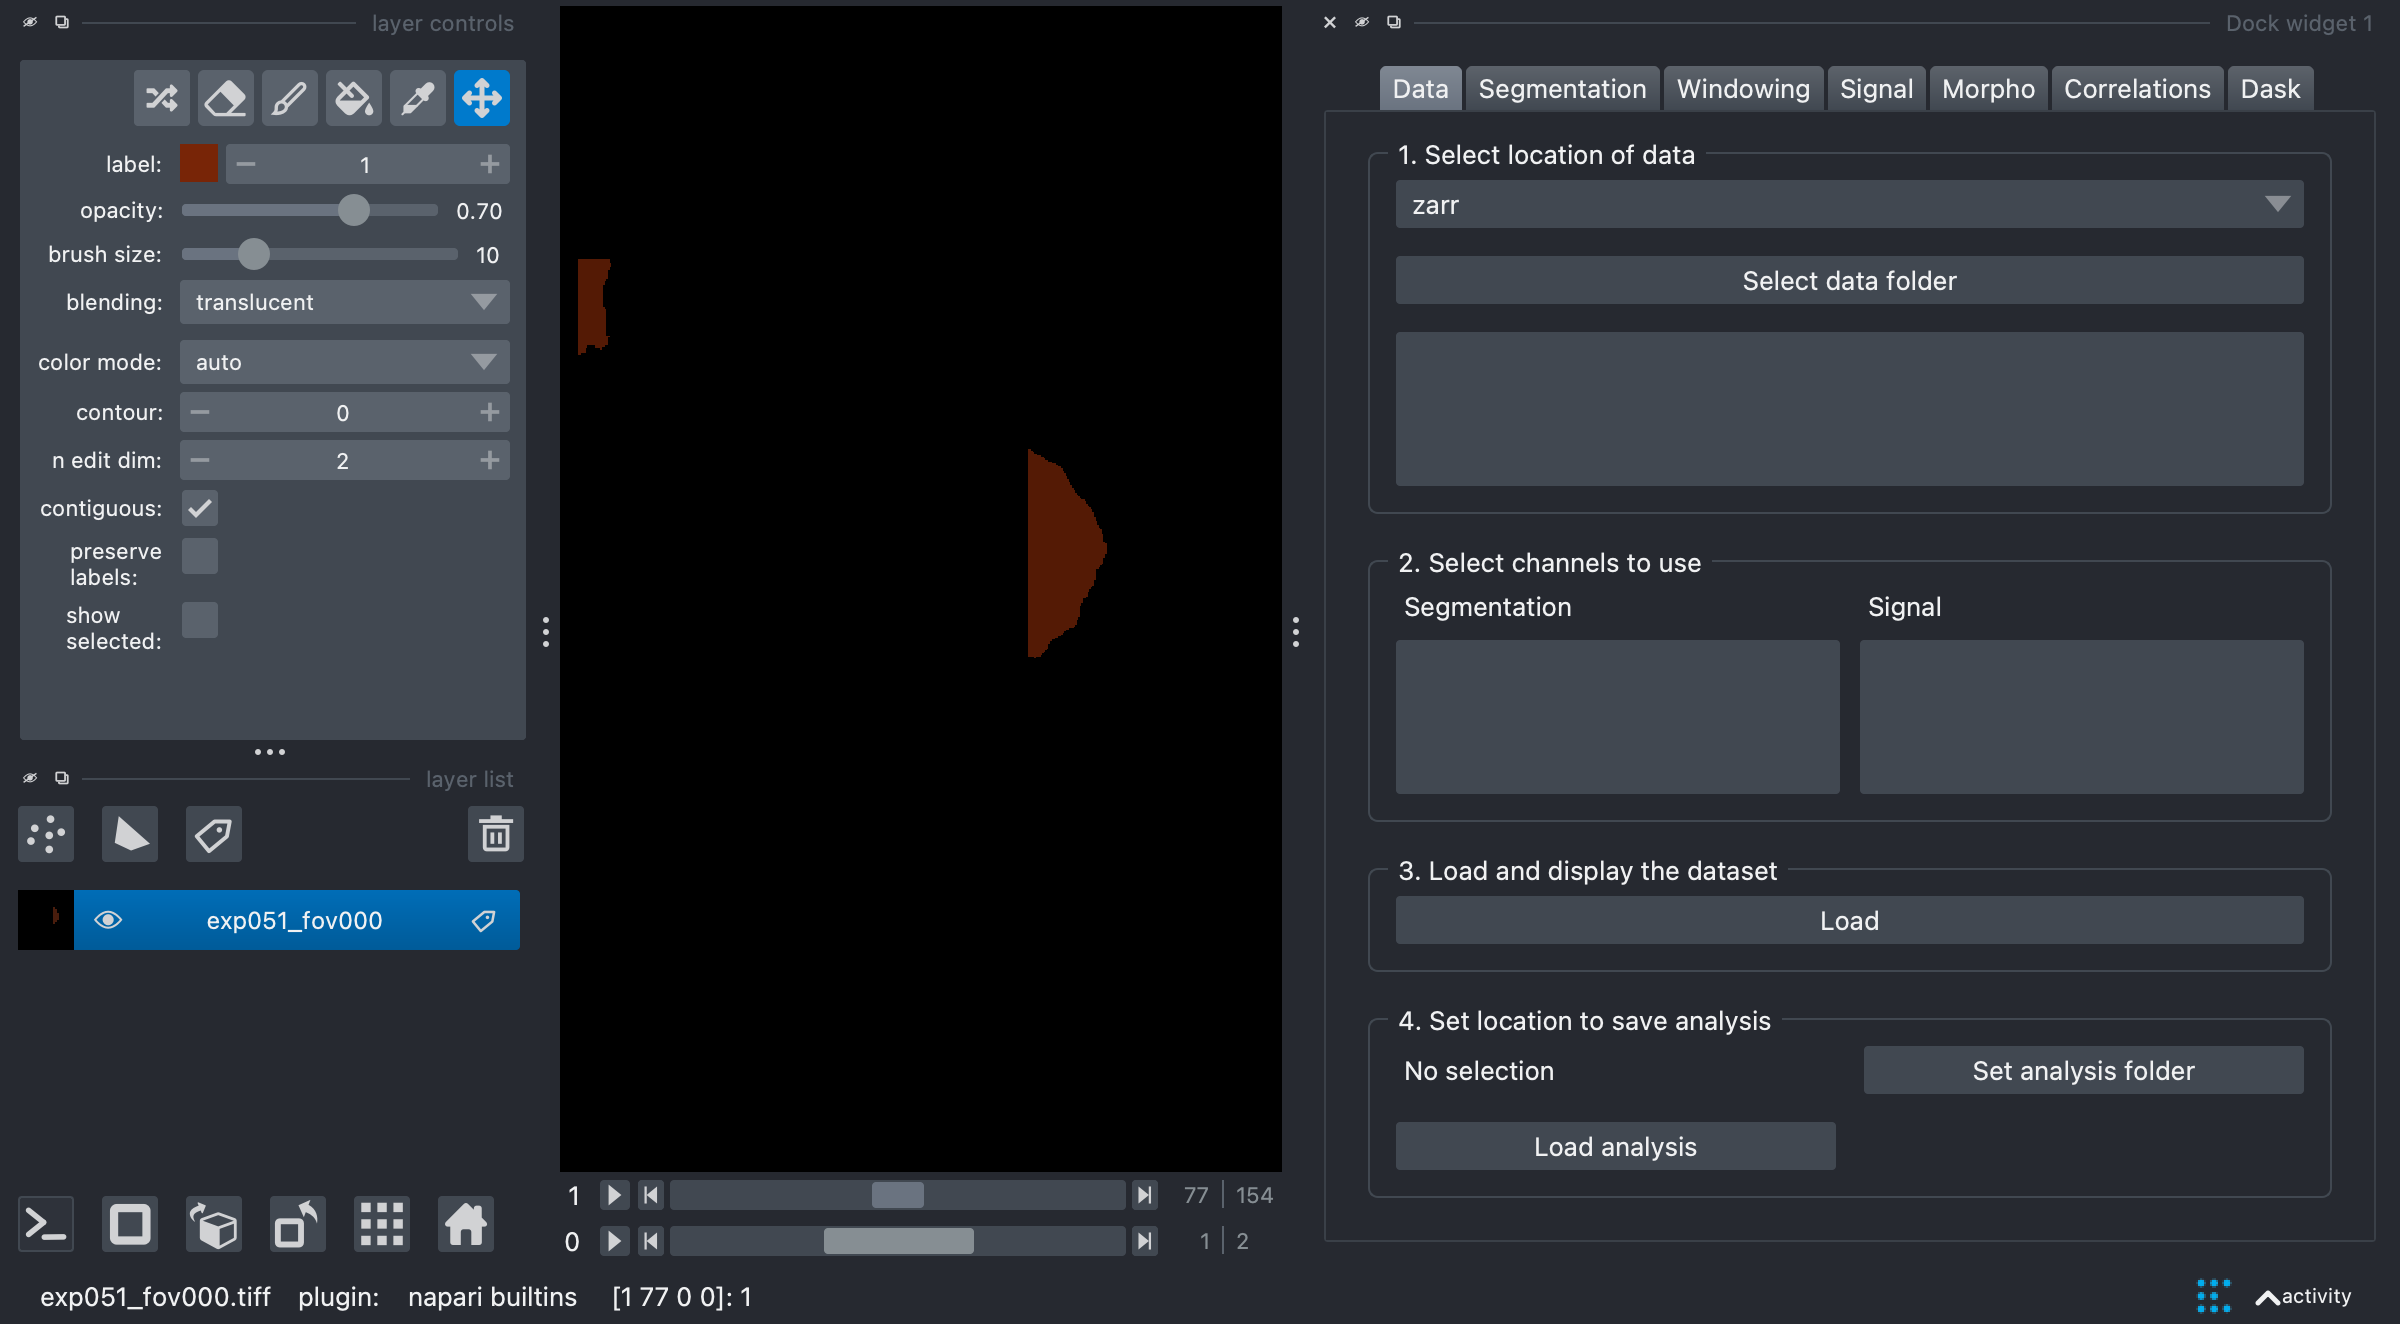

In [2]:
import napari
import skimage
import numpy as np
from napari.utils import nbscreenshot
from napari_morphodynamics.napari_gui import MorphoWidget
from qtpy.QtWidgets import QLabel, QSizePolicy

viewer = napari.Viewer()
viewer.window.resize(1200,400)
self = MorphoWidget(viewer)

self.setMaximumWidth(550)

viewer.window.add_dock_widget(self)
viewer.open('../../../Projects_data/napari-morphodynamics/exp051/exp051_fov000.tiff')
nbscreenshot(viewer)


The first problem is that the file was misinterpreted as a labels image. We can fix this by right-clicking on the layer and selecting ```Convert to image```:

In [3]:
from napari.layers._layer_actions import _convert_to_image, _split_stack
_convert_to_image(viewer.layers)
viewer.dims.current_step = (0,77,209,217)
viewer.layers['exp051_fov000'].gamma = 0.2

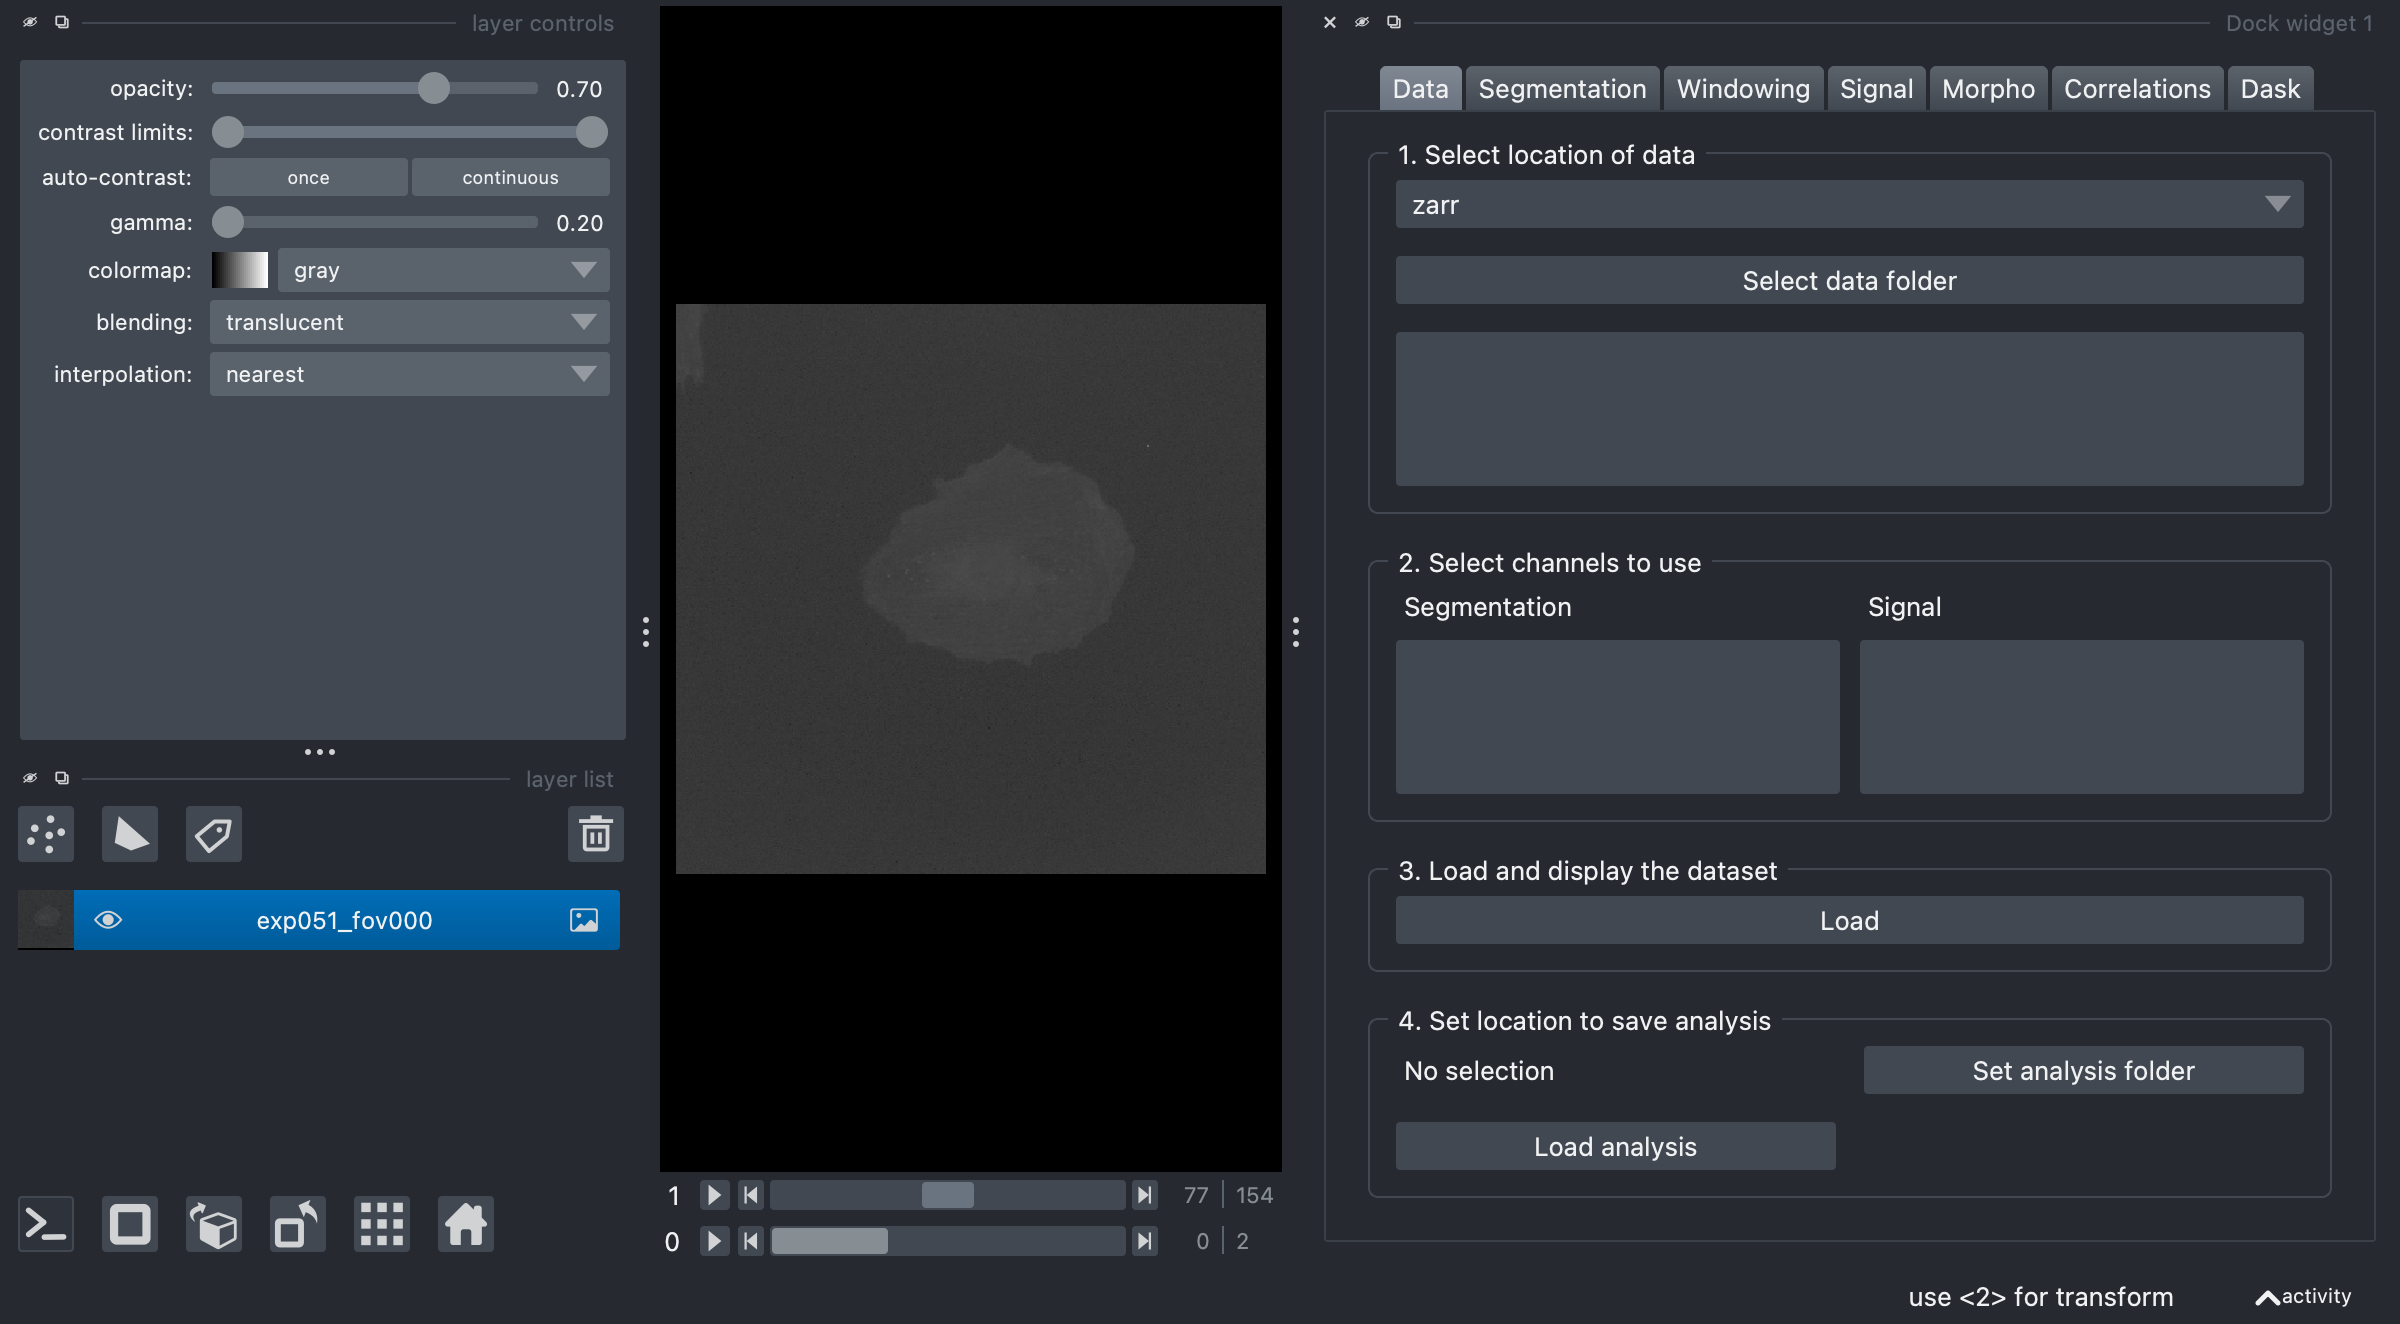

In [4]:
nbscreenshot(viewer)

Now our data are visible as an image, but multiple channels appear as a regular dimensions instead of layers. So we now right-click again on the layer and select ```Split stack```:

In [5]:
_split_stack(viewer.layers)

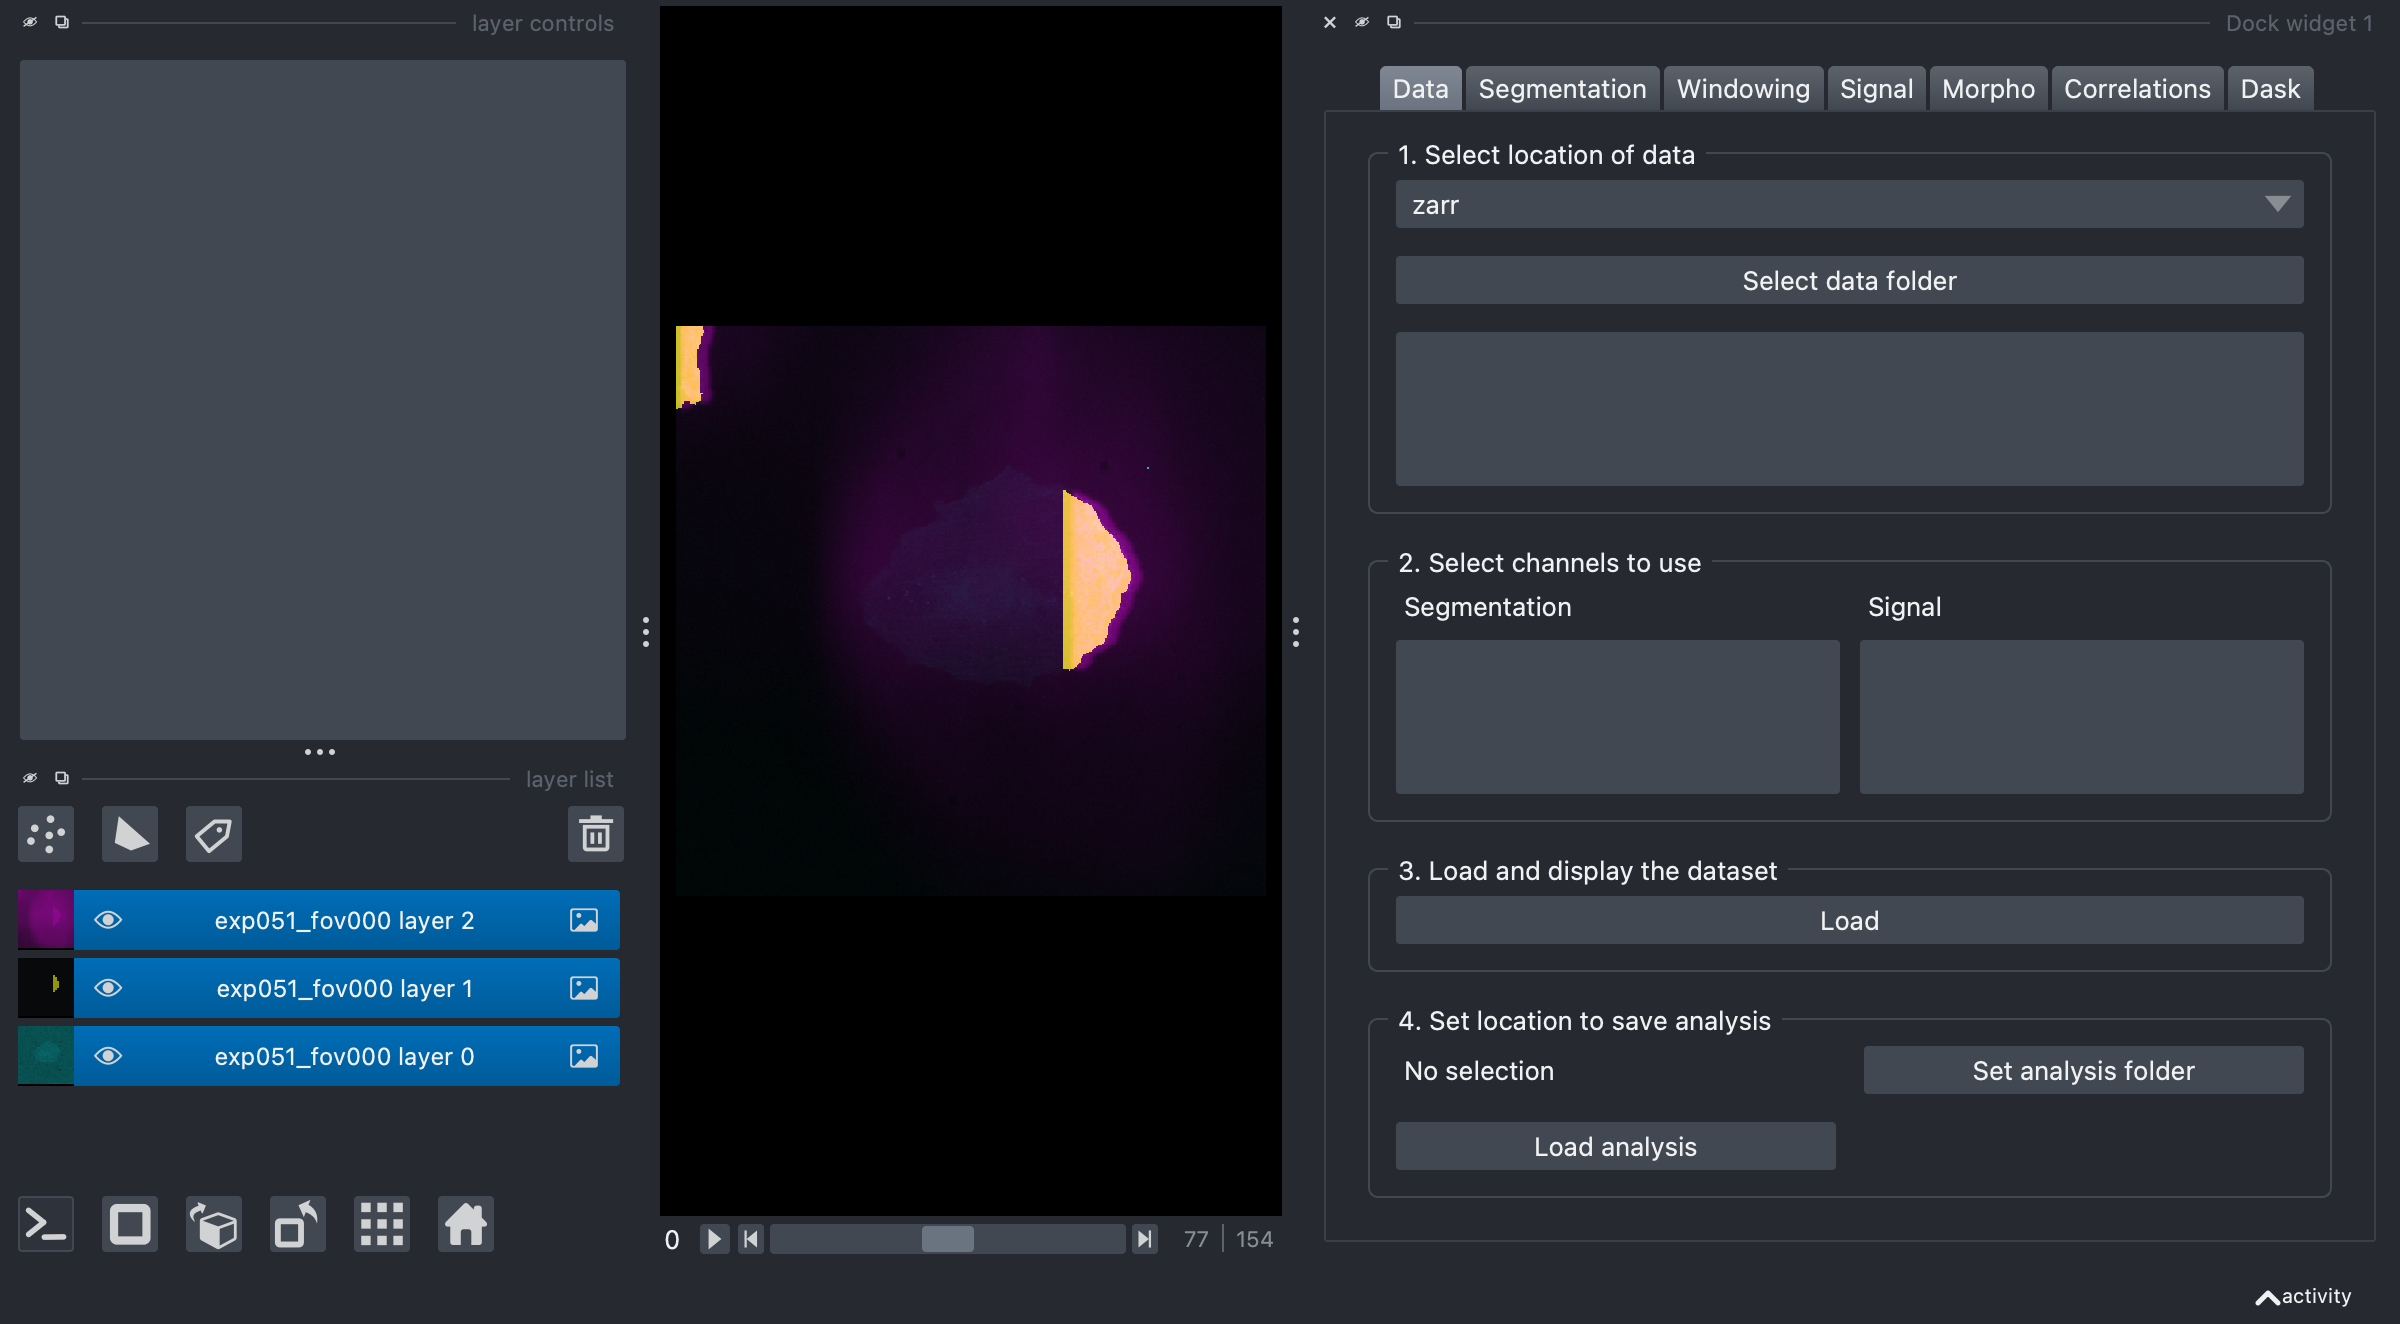

In [6]:
nbscreenshot(viewer)

## Selecting layers as input

Now in ```1. Select location of data``` we can select ```layers``` and then click on ```Select data folder```:

In [8]:
self.qcombobox_data_type.setCurrentText('layers')
self._on_click_select_file_folder()

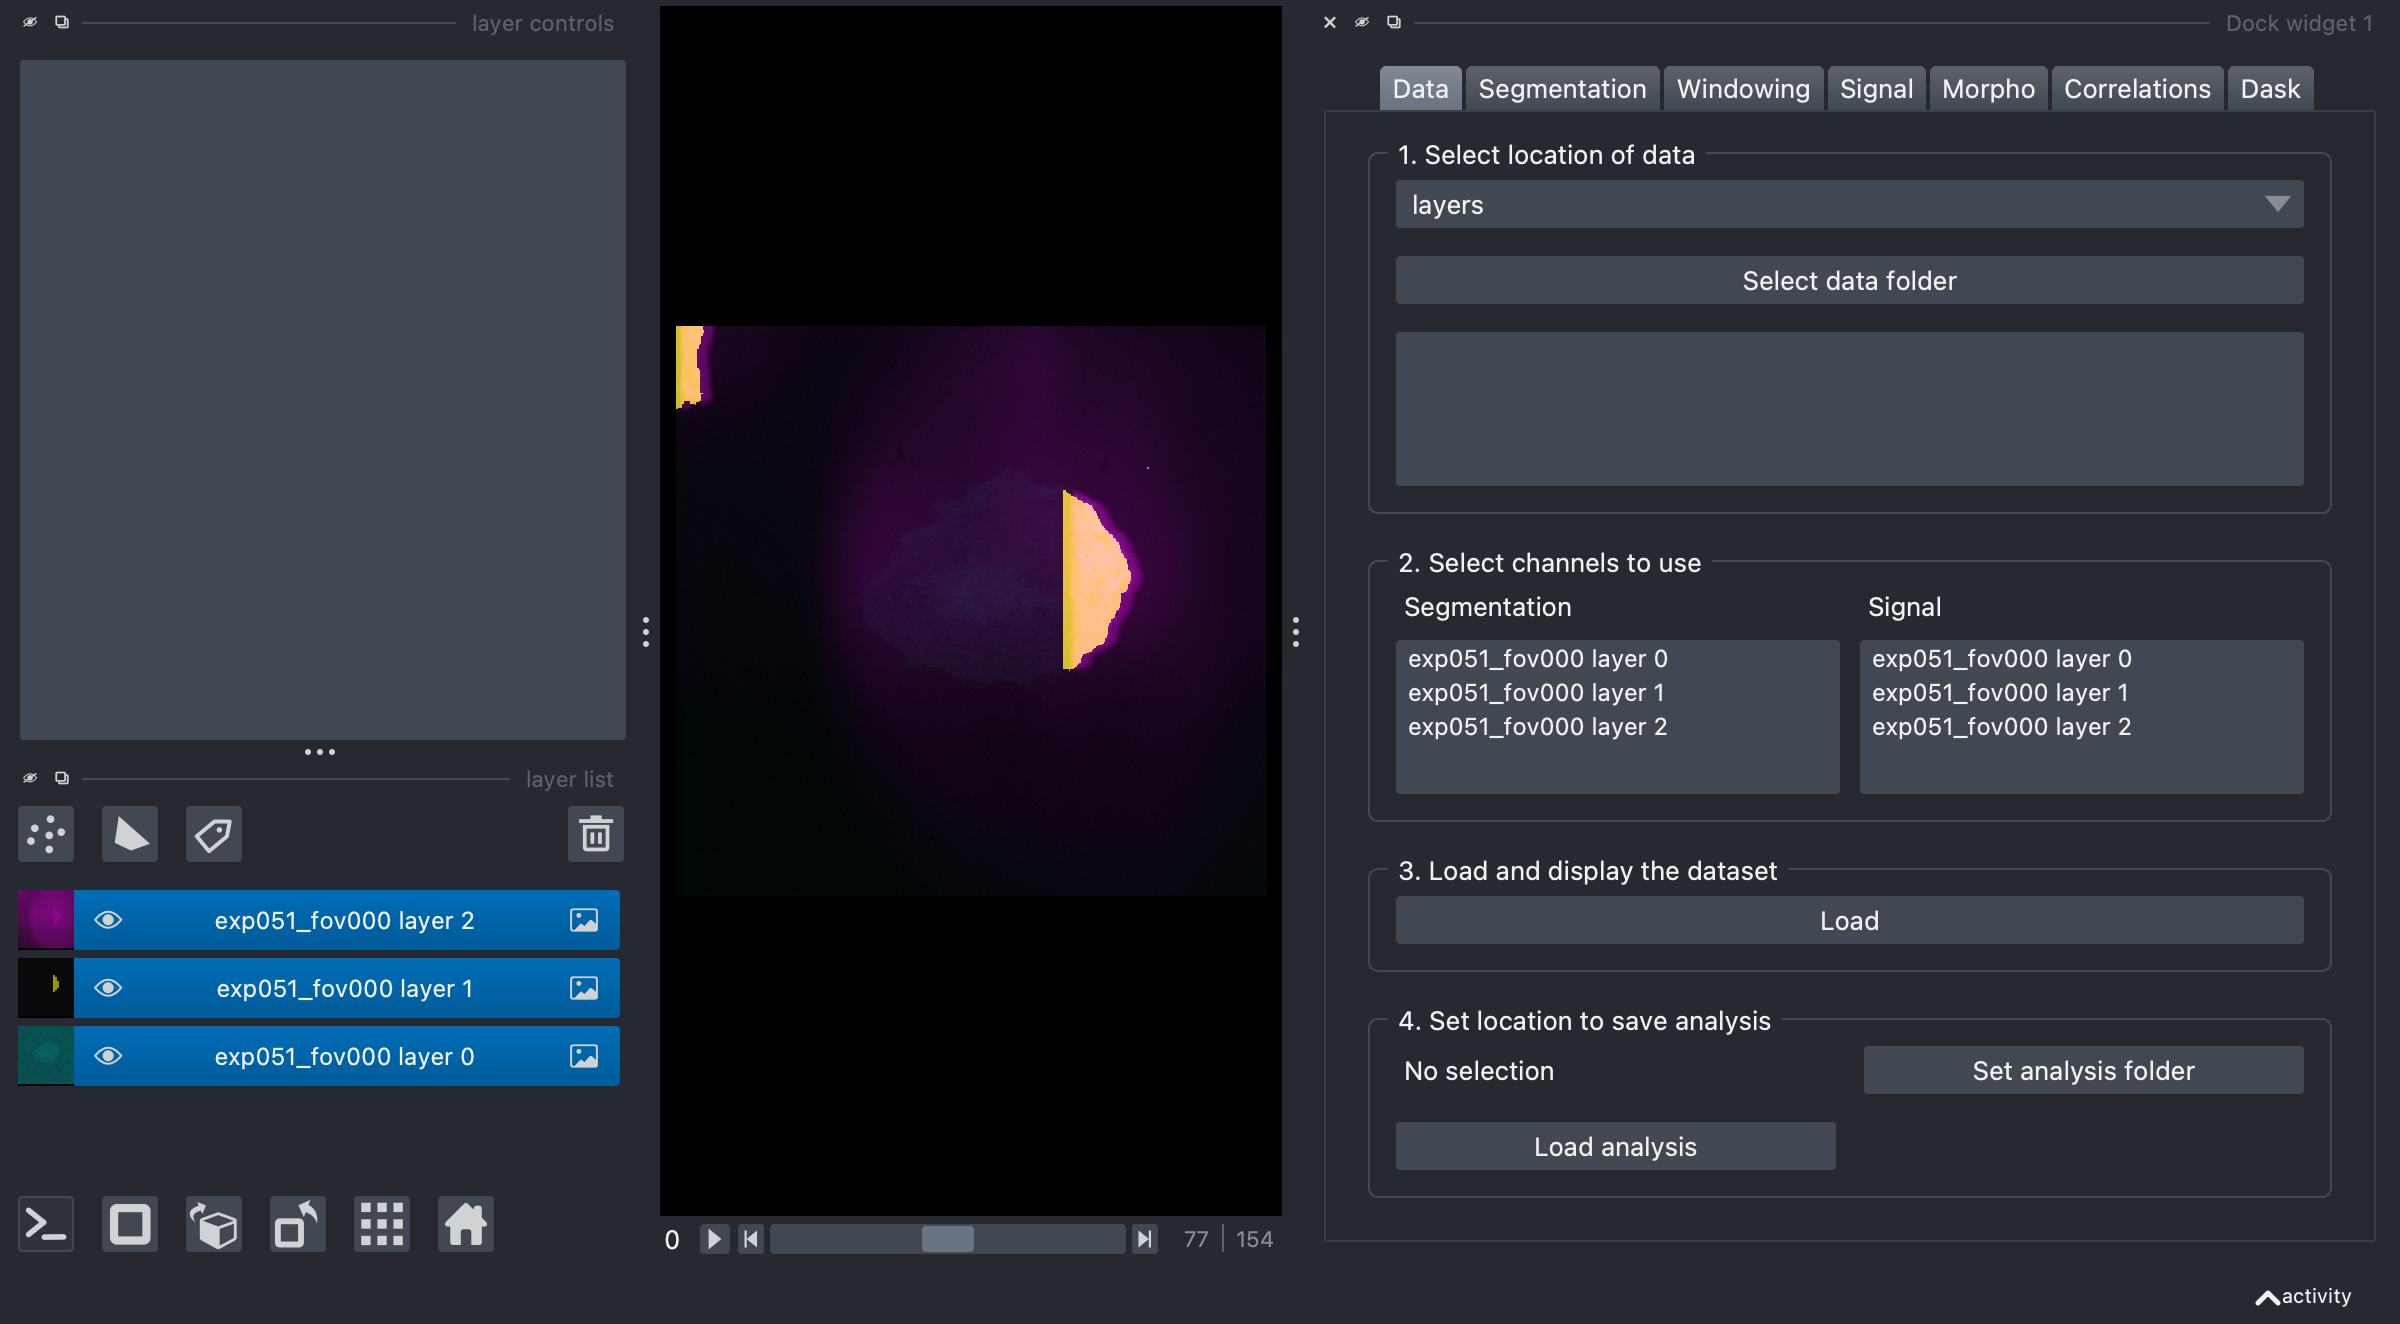

In [9]:
nbscreenshot(viewer)

The layers now appear in the ```2. Select channels to use``` options. We can select as usual which channel to use for segmentation and which for signal processing.

In [10]:
self.segm_channel.setCurrentRow(0)
for i in range(3):
    self.signal_channel.item(i).setSelected(True)

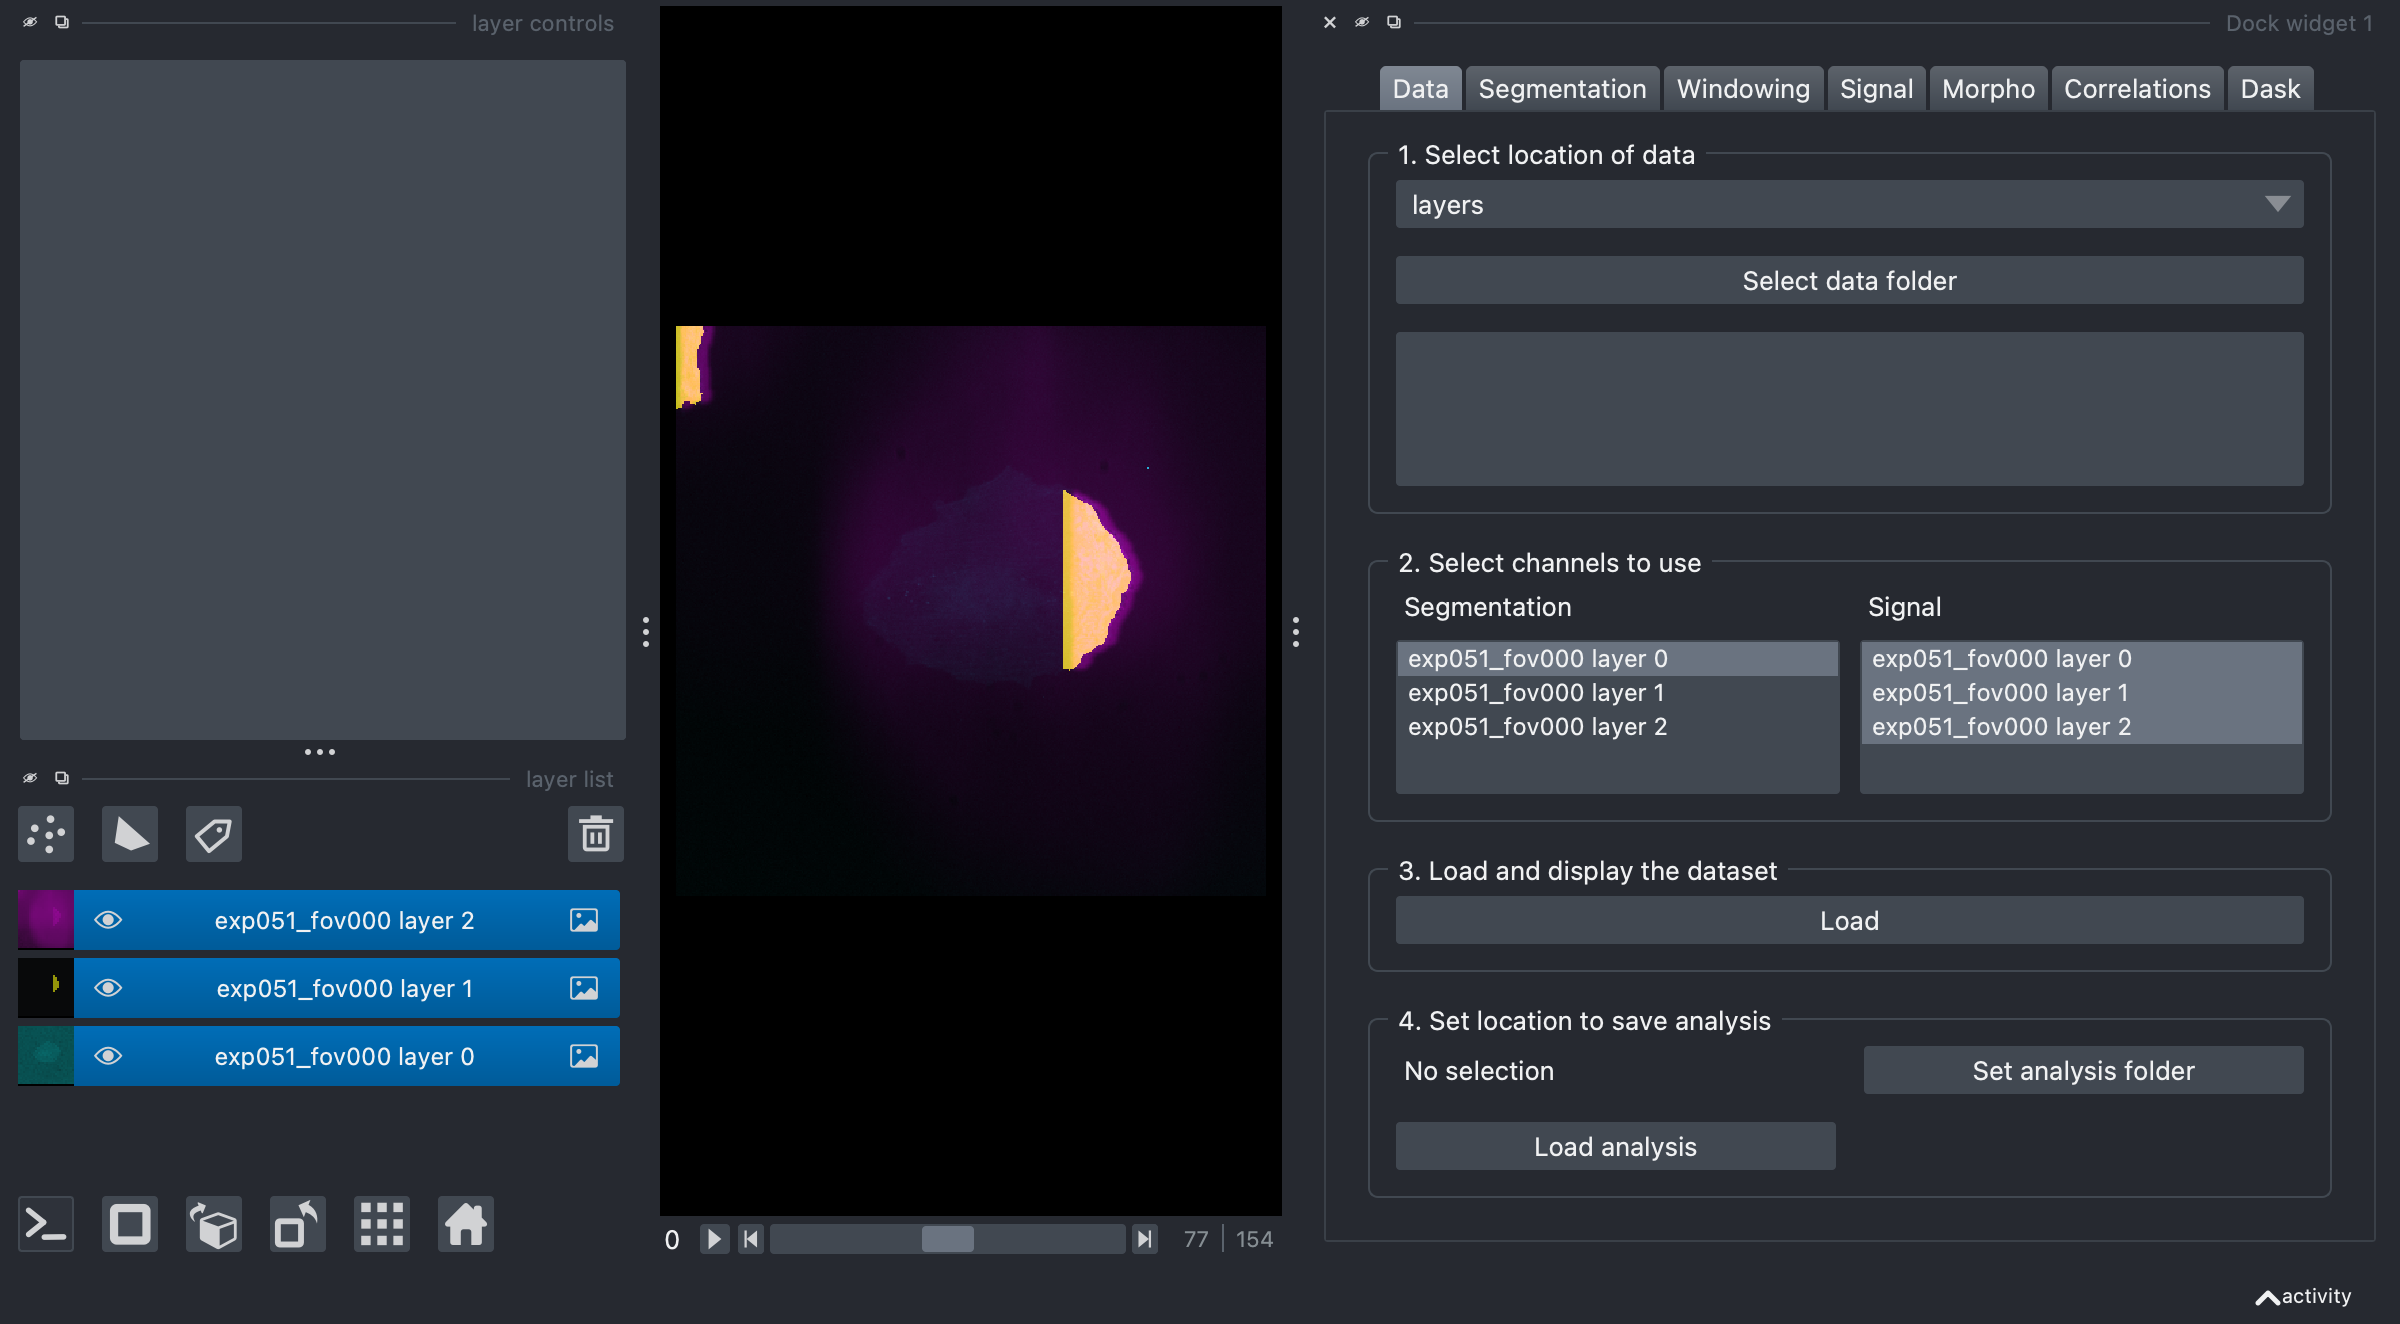

In [11]:
nbscreenshot(viewer)

Once done we also click on ```Load```. This prompts the user to point to a place where to save the data. The selected layers are then saved as a zarr file and loaded as regular dataset. From there you can proceed as usual.

In [12]:
self._on_load_dataset()

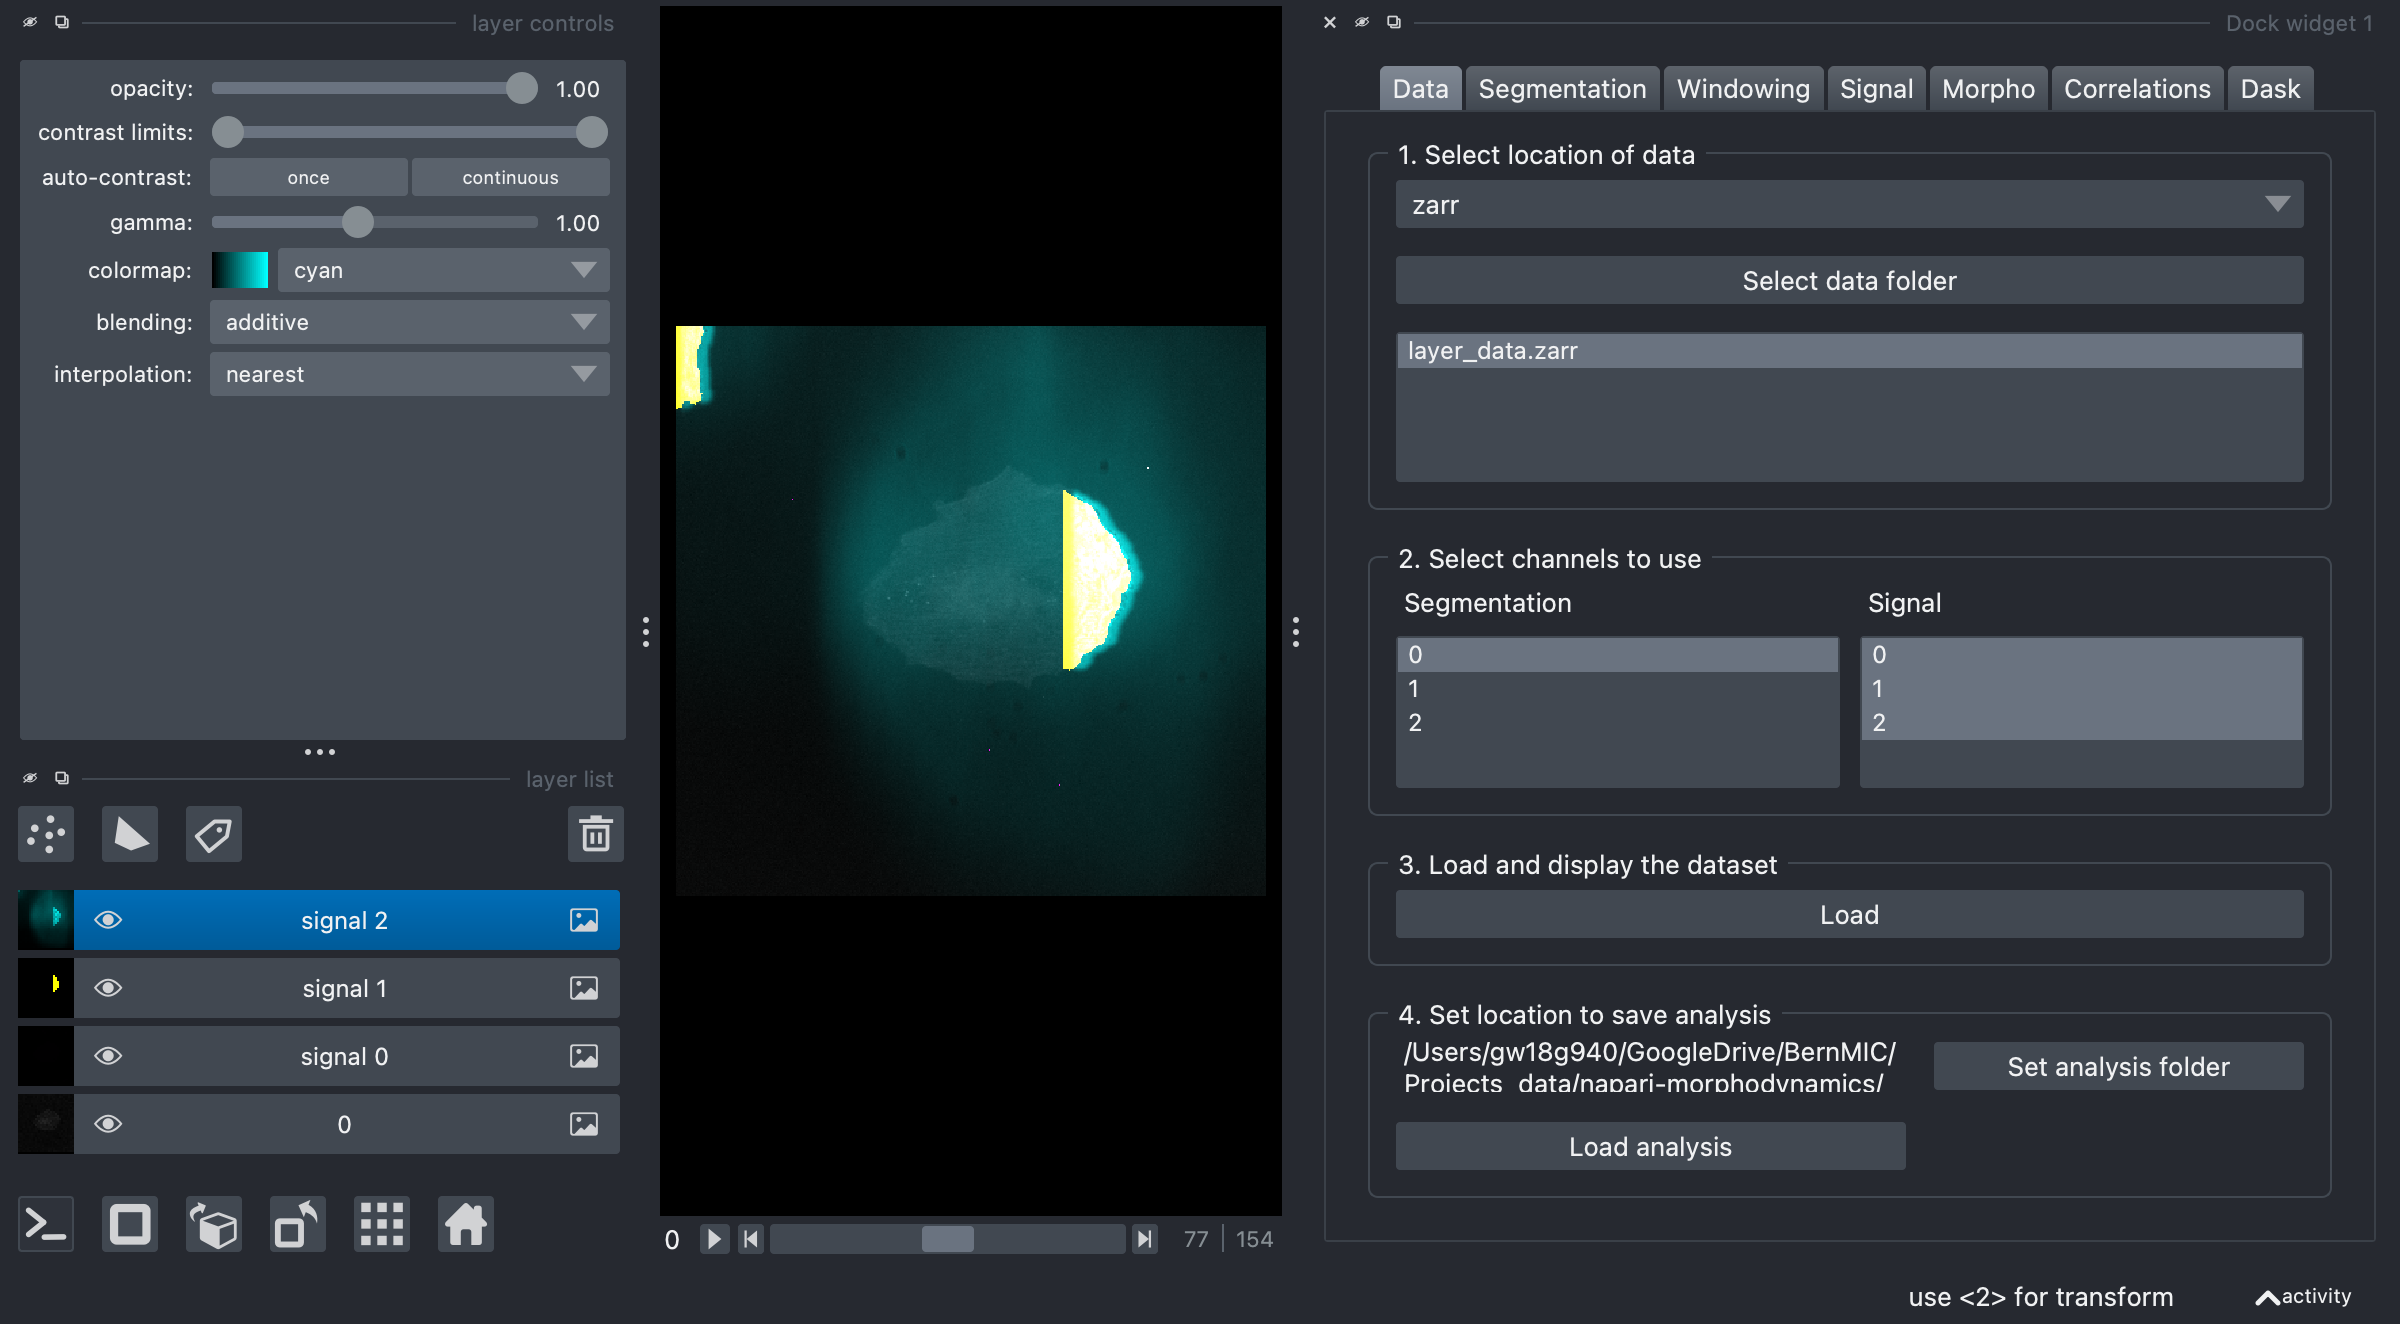

In [13]:
nbscreenshot(viewer)